# Sarah Thomas
# Project 4 - Personal Loan Campaign Modelling

__Description__ (copied from assignment)

__Background and Context__

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

__Objective__

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.
 

__Data Dictionary__
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# 1 - Load Packages and Read in the Dataset

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings("ignore")

# to make Python code more structured
%load_ext nb_black

# Remove limit from displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
bank = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

# 2 - Data Preprocessing (Part 1 of 2)

## 2.1 - Check the first and last 10 rows of the dataset as well as 10 random rows

In [4]:
# first 10 rows
bank.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [5]:
# last 10 rows
bank.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
# random 10 rows
np.random.seed(1)
bank.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

__Observations:__
* ID can most likely be dropped.
* Zip codes can bias the dataset in a discriminatory way (e.g., serve as proxy for race) and so needs to be dropped.
* Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard all need to be converted to categorical variables.

## 2.2 - Check the shape of the data

In [7]:
bank.shape

(5000, 14)

<IPython.core.display.Javascript object>

## 2.3 - Check the datatypes and row counts for each column

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

__Observation:__ There are no null values. 

## 2.4 - Drop Values

In [9]:
# From above observations, dropping ID (not relevant) and zip code (don't want to introduce discriminatory bias)
bank.drop(["ID"], axis=1, inplace=True)
bank.drop(["ZIPCode"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# 3 - EDA

## 3.1 - Explore Summary of Data

In [11]:
bank.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

__Observations:__
* Experience has negative values - need to treat variable so that min = 0.
* For Age, mean (45.3) is close to median (45.0). Indicates a symetrical distribution.
* For Income, the mean (73.77) is greater than the median (64.0). Indicates a right-skewed distribution.
* For Family, the mean (2.4) is close to the median (2.0). Indicates a symetrical distribution.
* For CCAvg, the mean (1.94) is greater than the median (1.5). Indicates a right-skewed distribution.

## 3.2 - Treat Experience

In [18]:
# Negative values need to be replaced with 0
bank.loc[bank["Experience"] < 0] = 0
bank["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
14    127
16    127
30    126
27    125
17    125
34    125
29    124
22    124
7     121
15    119
8     119
6     119
0     118
10    118
13    117
33    117
37    116
11    116
36    114
4     113
21    113
31    104
12    102
38     88
39     85
2      85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

## 3.3 - Univariate Analysis

In [12]:
# Function copied from prior case study:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [25]:
# Function copied from prior cae study:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### 3.3.1 - Explore dependent variable Personal_Loan

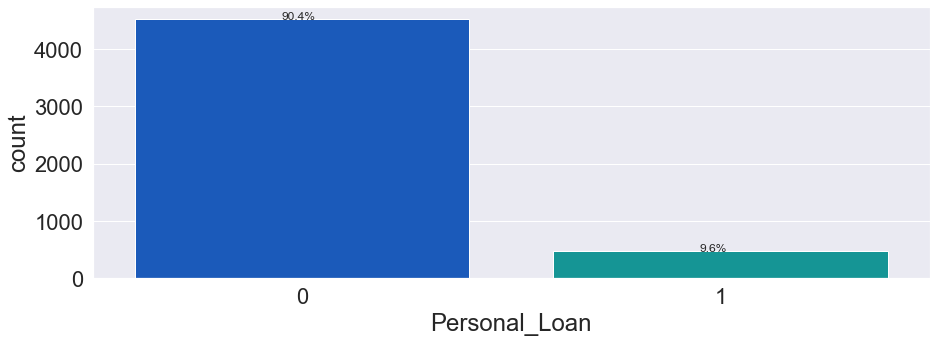

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Personal_Loan"], palette="winter")
perc_on_bar(ax, bank["Personal_Loan"])

__Observation:__ 90.4% did not accept the personal loan offered in the last campaign.

### 3.3.2 - Age

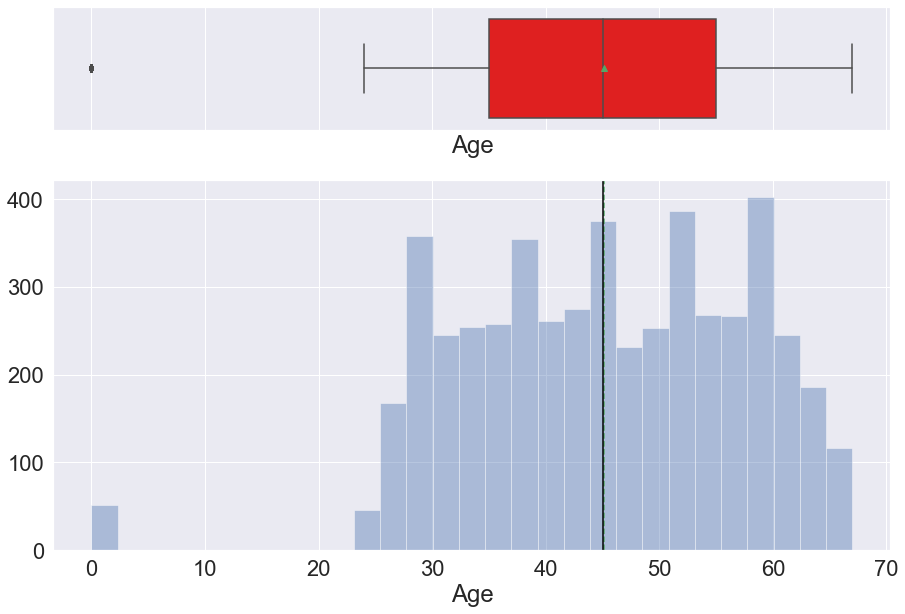

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(bank["Age"])

__Observation:__ Aside from outlier, age seems to be symmetrically distributed. Outliers will need to be treated.

### 3.3.3 - Experience

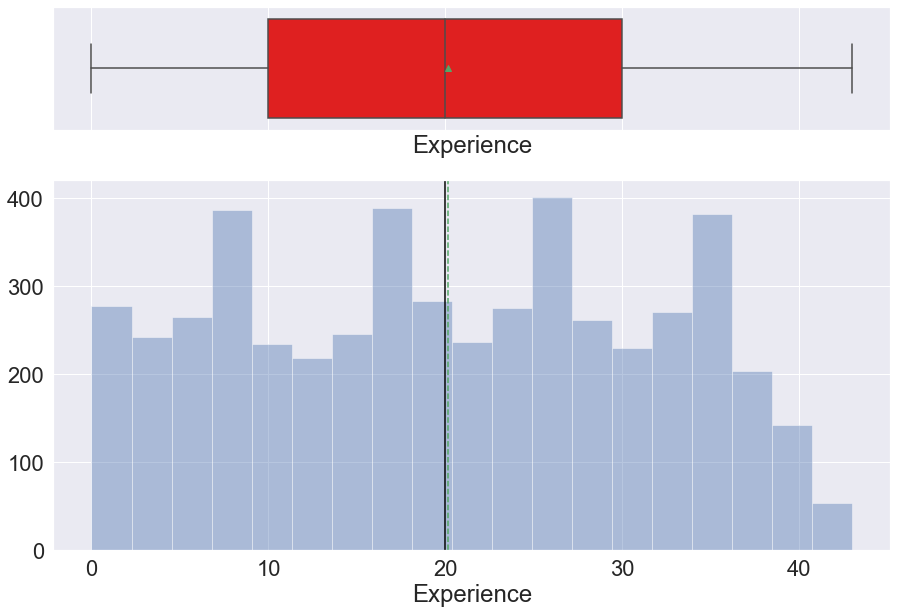

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(bank["Experience"])

__Observation:__ Experience seems symmetrically distributed.

### 3.3.4 - Income

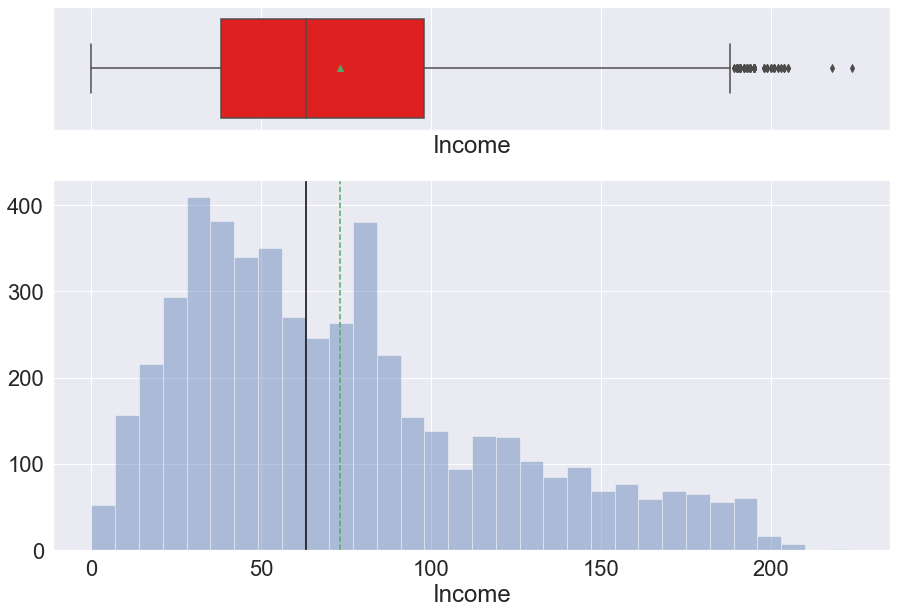

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(bank["Income"])

__Observation:__ Income is right-skewed. Outliers will need to be treated.

### 3.3.5 - Family 

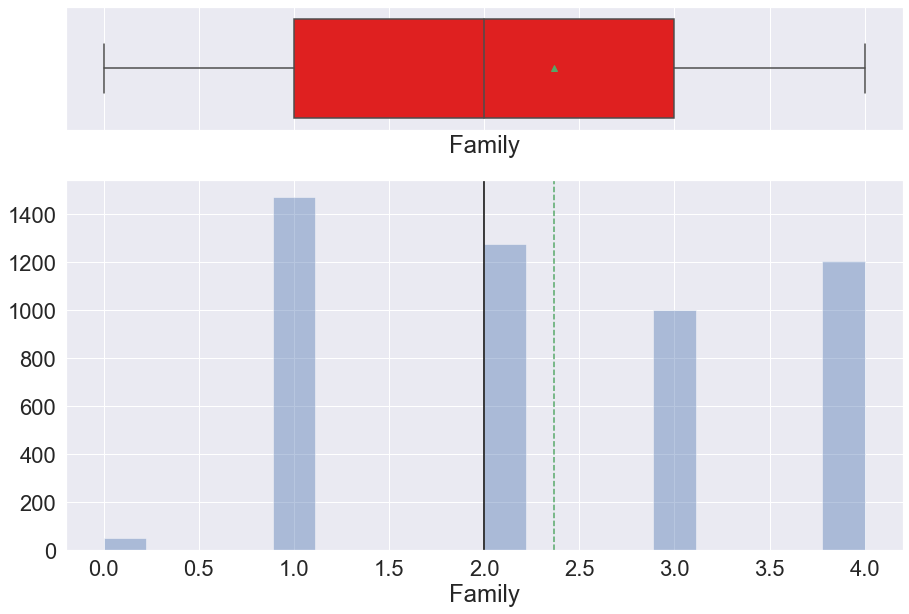

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(bank["Family"])

__Observation:__ There seem to be values of "0" for family which doesn't make sense. This discrepancy will need to be treated.

### 3.3.6 - CCAvg

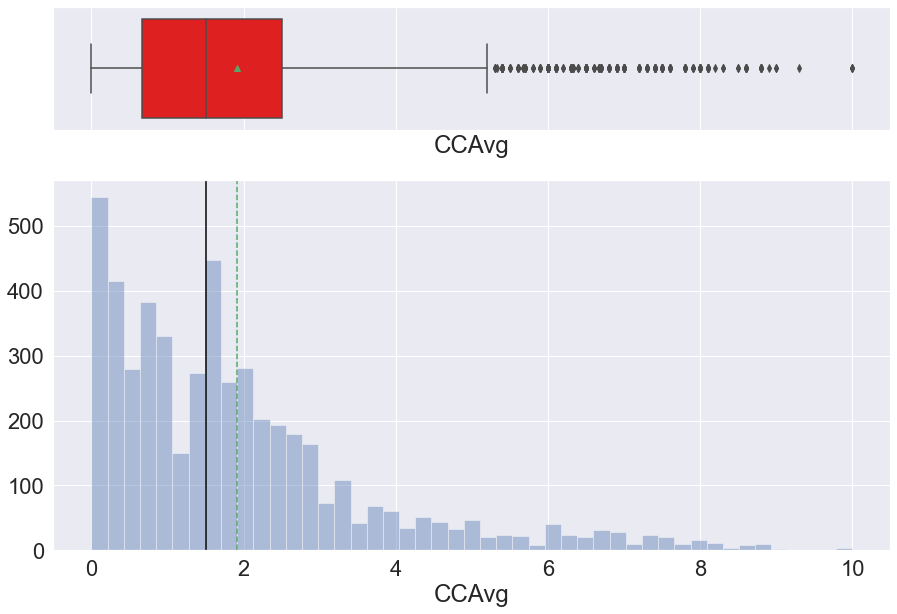

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(bank["CCAvg"])

__Observation:__ CCAvg is skewed right. Outliers will need to be treated.

### 3.3.7 - Education

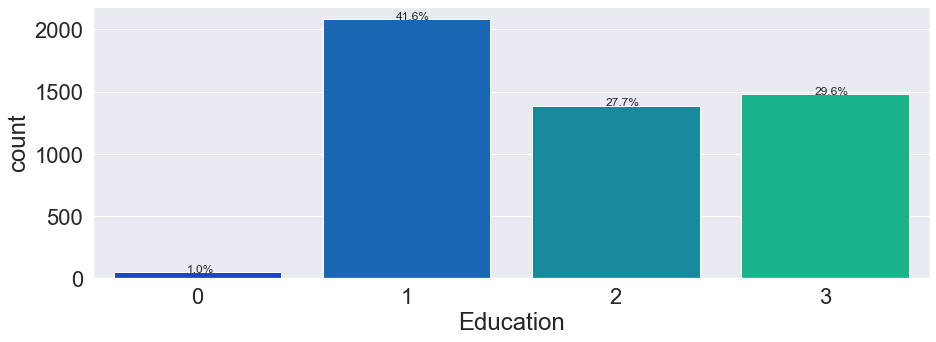

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Education"], palette="winter")
perc_on_bar(ax, bank["Education"])

__Observation:__ Most customers have at least an undergraduate degree (41.6%). 1.0% do not have a degreee.

### 3.3.8 - Mortgage

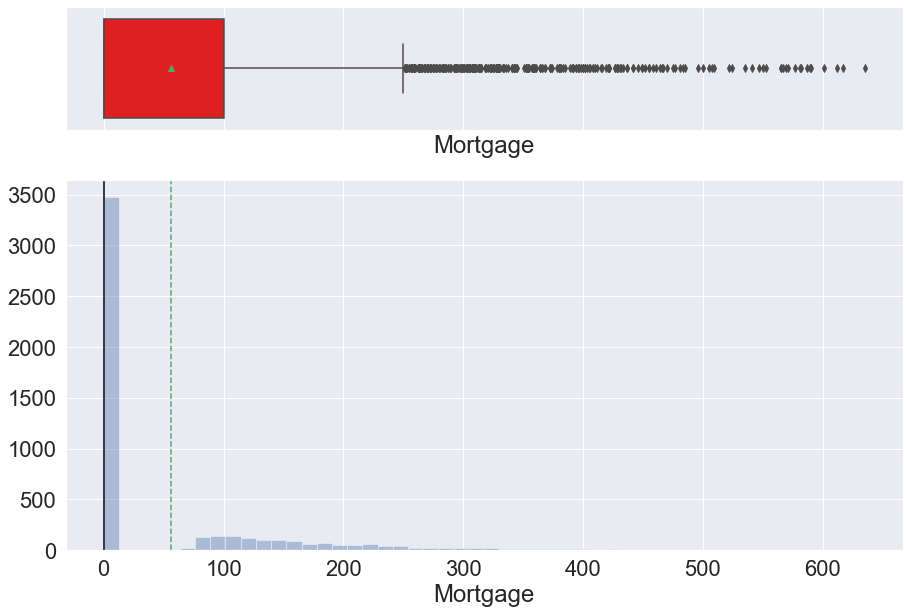

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(bank["Mortgage"])

__Observation:__ Mortgage is right skewed. Outliers will need to be treated.

### 3.3.9 - Securities_Account

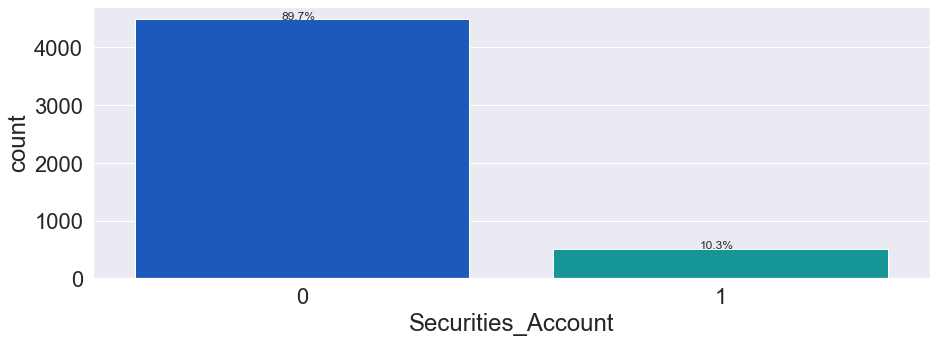

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Securities_Account"], palette="winter")
perc_on_bar(ax, bank["Securities_Account"])

__Observation:__ Most customers do not have a securities account (89.7%).

### 3.3.10 - CD_Account

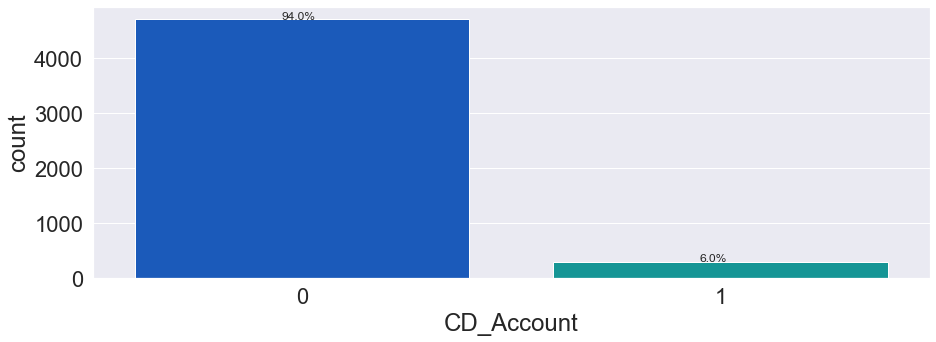

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["CD_Account"], palette="winter")
perc_on_bar(ax, bank["CD_Account"])

__Observation:__ Most customers do not have a CD account (94%).

### 3.3.11 - Online

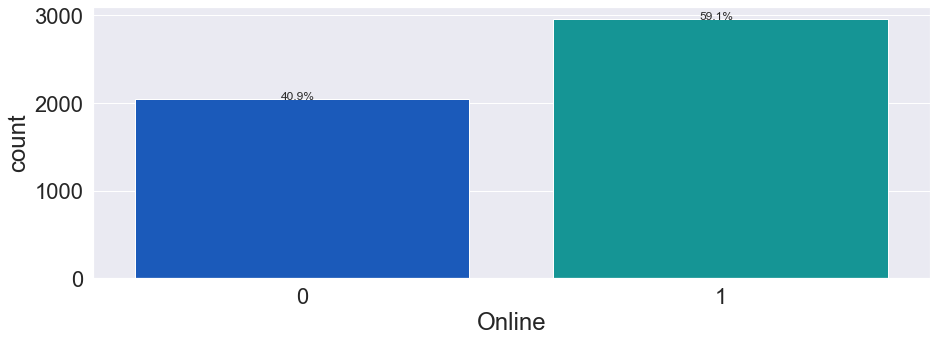

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Online"], palette="winter")
perc_on_bar(ax, bank["Online"])

__Observation:__ Most customers use online banking (59.1%).

### 3.3.12 - CreditCard

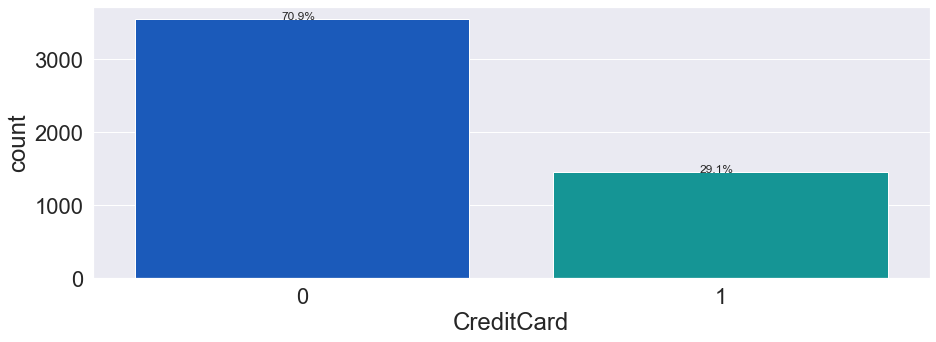

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["CreditCard"], palette="winter")
perc_on_bar(ax, bank["CreditCard"])

__Observation:__ Most customers do not use a credit card from another bank (70.9%).

## 3.4 - Bivariate Analysis

<AxesSubplot:>

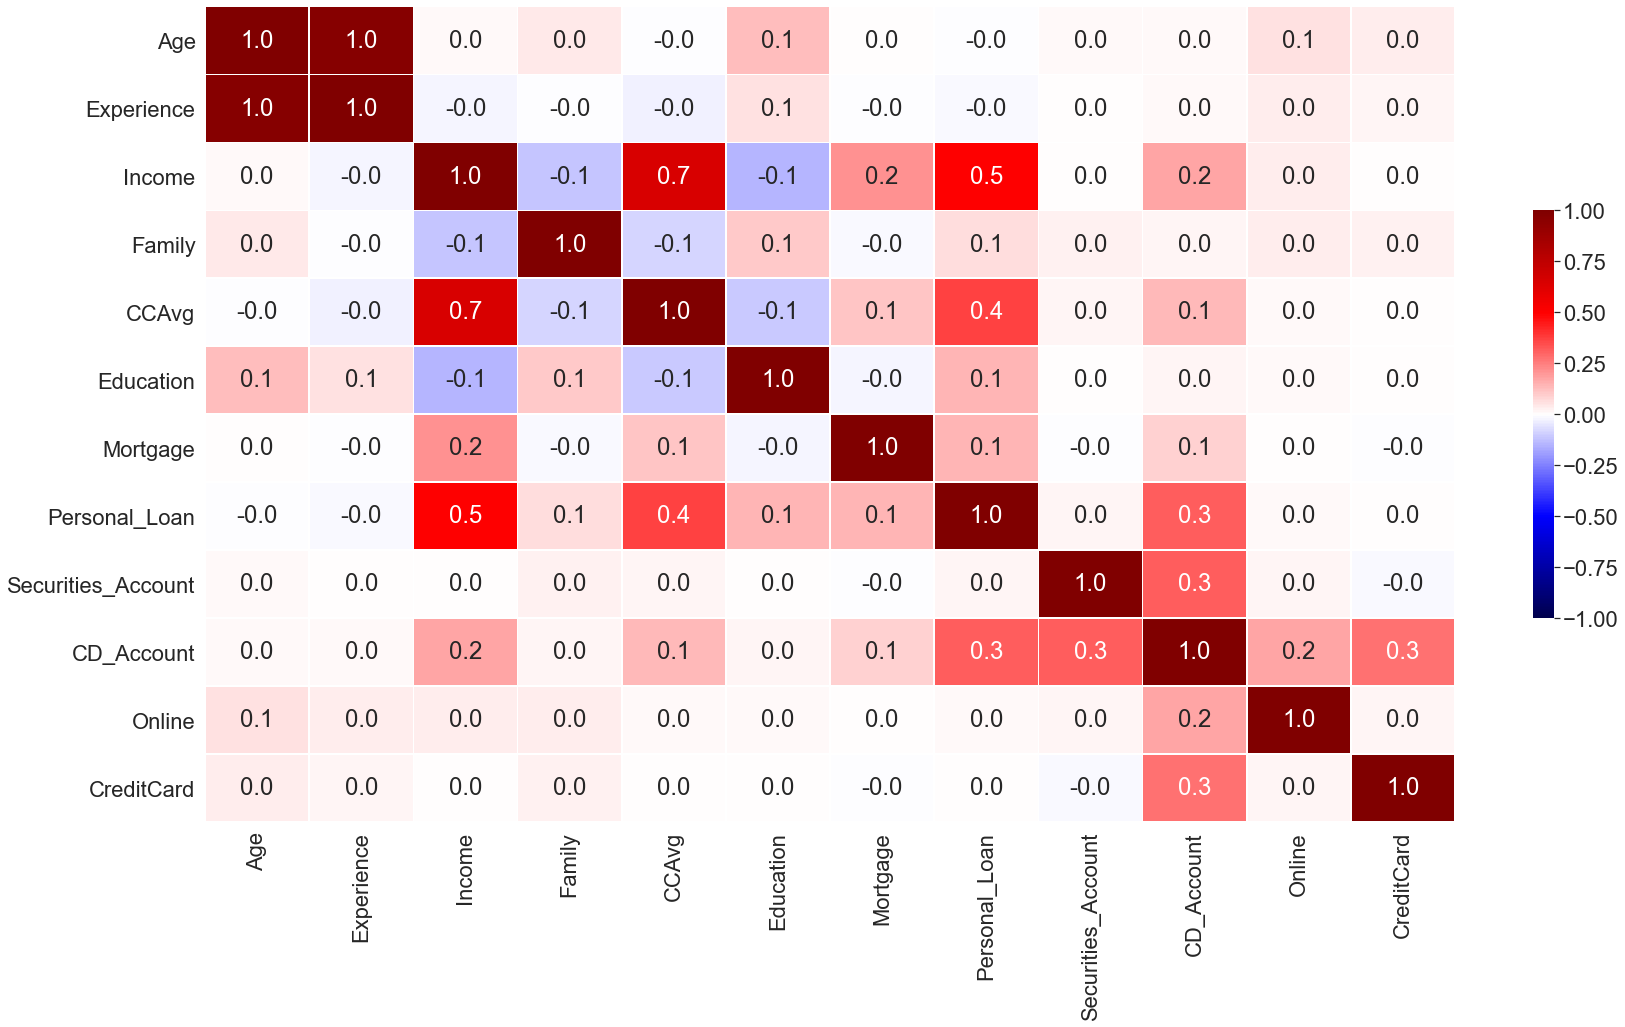

<IPython.core.display.Javascript object>

In [43]:
# Taken/customized from a previous case study:
numeric_columns = bank.select_dtypes(include=np.number).columns.tolist()

corr = bank[numeric_columns].corr()  # sorting correlations

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)